# Data Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.spatial
import warnings
import sklearn as sk
import operator
import numpy as np

warnings.simplefilter("ignore")

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

pd.__version__ #print which version of pandas you're using

'0.24.2'

## read in raw data

In [2]:
raw_data = pd.read_csv('h1b.csv')
raw_data.shape

(1279010, 50)

In [4]:
raw_data.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,EMPLOYER_ADDRESS,EMPLOYER_CITY,...,WAGE_UNIT_OF_PAY,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,PUBLIC_DISCLOSURE_LOCATION,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE
0,I-200-16055-173457,CERTIFIED-WITHDRAWN,2,H-1B,16,19,DISCOVER PRODUCTS INC.,NaN,2500 LAKE COOK ROAD,RIVERWOODS,...,Year,N,N,NaN,Y,NaN,RIVERWOODS,LAKE,IL,60015
1,I-200-16064-557834,CERTIFIED-WITHDRAWN,3,H-1B,16,19,DFS SERVICES LLC,NaN,2500 LAKE COOK ROAD,RIVERWOODS,...,Year,N,N,NaN,Y,NaN,RIVERWOODS,LAKE,IL,60015
2,I-200-16063-996093,CERTIFIED-WITHDRAWN,3,H-1B,16,19,EASTBANC TECHNOLOGIES LLC,NaN,1211 31ST ST. NW,WASHINGTON,...,Year,Y,N,Y,NaN,NaN,WASHINGTON,NaN,DC,20007
3,I-200-16272-196340,WITHDRAWN,9,H-1B,17,20,INFO SERVICES LLC,NaN,17177 NORTH LAUREL PARK DR,LIVONIA,...,Year,Y,N,Y,NaN,NaN,JERSEY CITY,HUDSON,NJ,07302
4,I-200-15053-636744,CERTIFIED-WITHDRAWN,2,H-1B,15,18,BB&T CORPORATION,NaN,223 WEST NASH STREET,WILSON,...,Year,N,N,NaN,Y,NaN,NEW YORK,NEW YORK,NY,10036


In [3]:
raw_data.columns

Index(['CASE_NUMBER', 'CASE_STATUS', 'CASE_SUBMITTED', 'VISA_CLASS',
       'EMPLOYMENT_START_DATE', 'EMPLOYMENT_END_DATE', 'EMPLOYER_NAME',
       'EMPLOYER_BUSINESS_DBA', 'EMPLOYER_ADDRESS', 'EMPLOYER_CITY',
       'EMPLOYER_STATE', 'EMPLOYER_POSTAL_CODE', 'EMPLOYER_COUNTRY',
       'EMPLOYER_PROVINCE', 'EMPLOYER_PHONE', 'EMPLOYER_PHONE_EXT',
       'AGENT_REPRESENTING_EMPLOYER', 'AGENT_ATTORNEY_NAME',
       'AGENT_ATTORNEY_CITY', 'AGENT_ATTORNEY_STATE', 'JOB_TITLE', 'SOC_CODE',
       'SOC_NAME', 'NAICS_CODE', 'TOTAL_WORKERS', 'NEW_EMPLOYMENT',
       'CONTINUED_EMPLOYMENT', 'CHANGE_PREVIOUS_EMPLOYMENT',
       'NEW_CONCURRENT_EMPLOYMENT', 'CHANGE_EMPLOYER', 'AMENDED_PETITION',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'PW_UNIT_OF_PAY',
       'PW_WAGE_LEVEL', 'PW_SOURCE', 'PW_SOURCE_YEAR', 'PW_SOURCE_OTHER',
       'WAGE_RATE_OF_PAY_FROM', 'WAGE_RATE_OF_PAY_TO', 'WAGE_UNIT_OF_PAY',
       'H1B_DEPENDENT', 'WILLFUL_VIOLATOR', 'SUPPORT_H1B', 'LABOR_CON_AGREE',
       'PUBLIC_D

## Status statistics

In [25]:
status_gr = raw_data.groupby('CASE_STATUS')
status_stats = []
status_index = []
total_len = len(raw_data)
for index, status in status_gr:
    print(index)
    print(len(status))
    status_index.append(index)
    rate = len(status) * 1.0 / total_len
    status_stats.append(rate)

print(status_index)
print(status_stats)

CERTIFIED
1125143
CERTIFIED-WITHDRAWN
94708
DENIED
17107
WITHDRAWN
42052
['CERTIFIED', 'CERTIFIED-WITHDRAWN', 'DENIED', 'WITHDRAWN']
[0.8796983604506611, 0.07404789641988725, 0.013375188622450176, 0.03287855450700151]


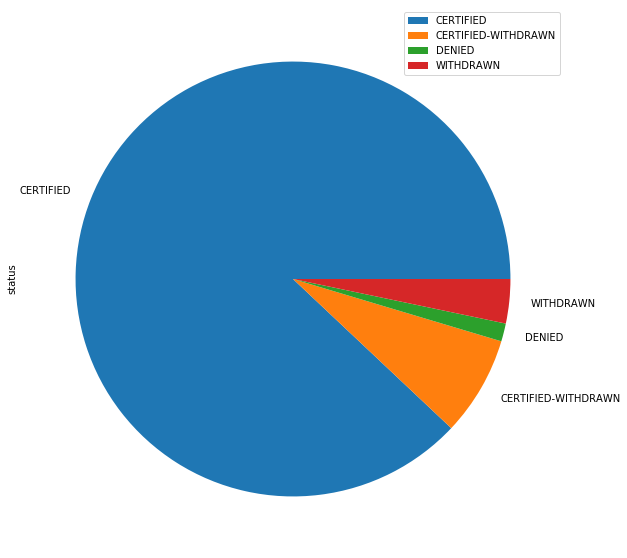

In [24]:
status_df = pd.DataFrame({'status': status_stats}, index=status_index)
status_df.plot.pie(y='status', figsize=(50,10))

## Find companies whose employees have highest chance to get certified

### only consider large companies that # of applicants > 1000

In [35]:
employer = raw_data.groupby('EMPLOYER_NAME')
emp_stats = {}
for ename, emp in employer:
    size = len(emp)
    if size > 1000:
        emp_stats[ename] = size

emp_tup = sorted(emp_stats.items(), key=operator.itemgetter(1), reverse=True)

for name, count in emp_tup:
    print(name + ": " + str(count))

INFOSYS LIMITED: 32178
TATA CONSULTANCY SERVICES LIMITED: 28133
DELOITTE CONSULTING LLP: 23319
CAPGEMINI AMERICA INC: 15668
TECH MAHINDRA (AMERICAS),INC.: 13378
ACCENTURE LLP: 13071
ERNST & YOUNG U.S. LLP: 12988
IBM INDIA PRIVATE LIMITED: 11886
WIPRO LIMITED: 11483
COGNIZANT TECHNOLOGY SOLUTIONS US CORP: 11086
MICROSOFT CORPORATION: 10557
IBM CORPORATION: 7713
HCL AMERICA, INC.: 6793
GOOGLE LLC: 6099
GOOGLE INC.: 5552
LARSEN & TOUBRO INFOTECH LIMITED: 5028
SYNTEL INC: 4744
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION: 4695
FACEBOOK, INC.: 4467
AMAZON CORPORATE LLC: 4308
SYNTEL CONSULTING INC.: 4192
AMAZON.COM SERVICES, INC.: 3894
JPMORGAN CHASE & CO.: 3738
APPLE INC.: 3674
PRICEWATERHOUSECOOPERS ADVISORY SERVICES LLC: 3425
L&T TECHNOLOGY SERVICES LIMITED: 3291
DELOITTE & TOUCHE LLP: 3124
HEXAWARE TECHNOLOGIES, INC.: 2885
COMPUNNEL SOFTWARE GROUP, INC.: 2871
PEOPLE TECH GROUP INC.: 2725
INTEL CORPORATION: 2673
WAL-MART ASSOCIATES, INC.: 2632
NTT DATA, INC.: 2494
PRICEWATERHOUSECOOPER

In [25]:
def calc_accept_rate(comp_name):
    comp_df = employer.get_group(comp_name)
    com_status = comp_df['CASE_STATUS']
    certified = 0
    for i in com_status:
        if i == 'CERTIFIED':
            certified += 1
        
    return certified * 1.0 / len(com_status)


In [26]:
emp_rate = {}
for name, cnt in emp_tup:
    emp_rate[name] = calc_accept_rate(name)
emp_rate_tup = sorted(emp_rate.items(), key=operator.itemgetter(1), reverse=True)

In [37]:
employer_name = []
employer_app_cnt = []
employer_certified_rate = []
for name, rate in emp_rate_tup:
    employer_name.append(name)
    employer_app_cnt.append(emp_stats[name])
    employer_certified_rate.append(round(rate * 100, 2))
    
employer_df = pd.DataFrame([employer_name, employer_app_cnt, employer_certified_rate])
employer_df = employer_df.transpose()
employer_df.columns = ['Company Name', 'Application Number', 'Certified Rate']
employer_df.to_csv('Employer_Statistics.csv', index=False)
employer_df.head(100)

,Company Name,Application Number,Certified Rate
0,INFOSYS LIMITED,32178,99.89
1,"TECH MAHINDRA (AMERICAS),INC.",13378,99.76
2,"MASTECH DIGITAL TECHNOLOGIES, INC., A MASTECH ...",2171,99.54
3,TATA CONSULTANCY SERVICES LIMITED,28133,99.25
4,"COMPUNNEL SOFTWARE GROUP, INC.",2871,99.2
5,INTEL CORPORATION,2673,99.06
6,"ORACLE AMERICA, INC",1559,99.04
7,"HCL AMERICA, INC.",6793,98.87
8,ERNST & YOUNG U.S. LLP,12988,98.84
9,PRICEWATERHOUSECOOPERS ADVISORY SERVICES LLC,3425,98.74


### consider the companies whose applicants > 5000, and compare the certified rate between those companies

In [60]:
employer_df_5000 = employer_df[employer_df['Application Number'] > 5000]
employer_df_5000 = employer_df_5000.set_index('Company Name')
employer_df_5000.head(20)

,Application Number,Certified Rate
Company Name,,
INFOSYS LIMITED,32178,99.89
"TECH MAHINDRA (AMERICAS),INC.",13378,99.76
TATA CONSULTANCY SERVICES LIMITED,28133,99.25
"HCL AMERICA, INC.",6793,98.87
ERNST & YOUNG U.S. LLP,12988,98.84
ACCENTURE LLP,13071,97.61
DELOITTE CONSULTING LLP,23319,97.35
LARSEN & TOUBRO INFOTECH LIMITED,5028,95.6
MICROSOFT CORPORATION,10557,94.68


Text(0.5, 0, 'Company Name')

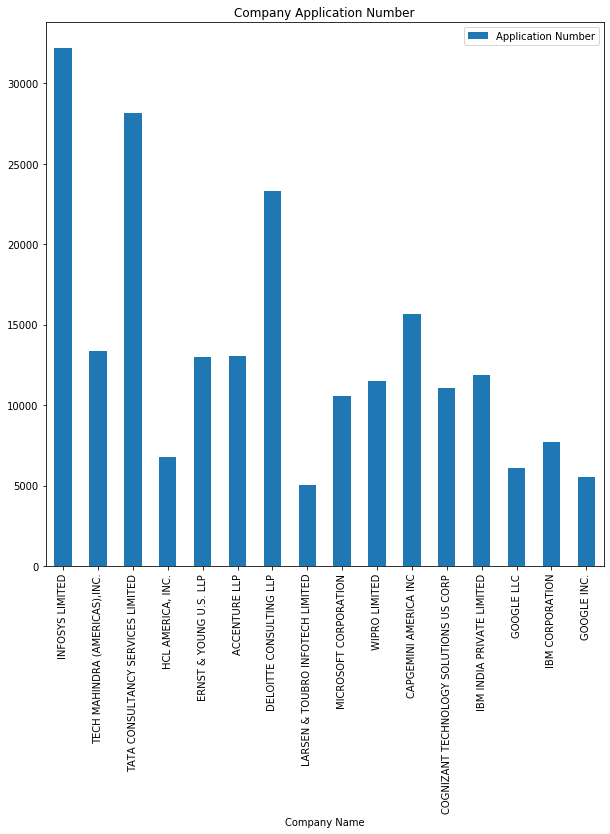

In [64]:
app_num = employer_df_5000.drop('Certified Rate', axis=1)
app_num.plot(kind='bar', title='Company Application Number', figsize=(10, 10)).set_xlabel('Company Name')

(60, 100)

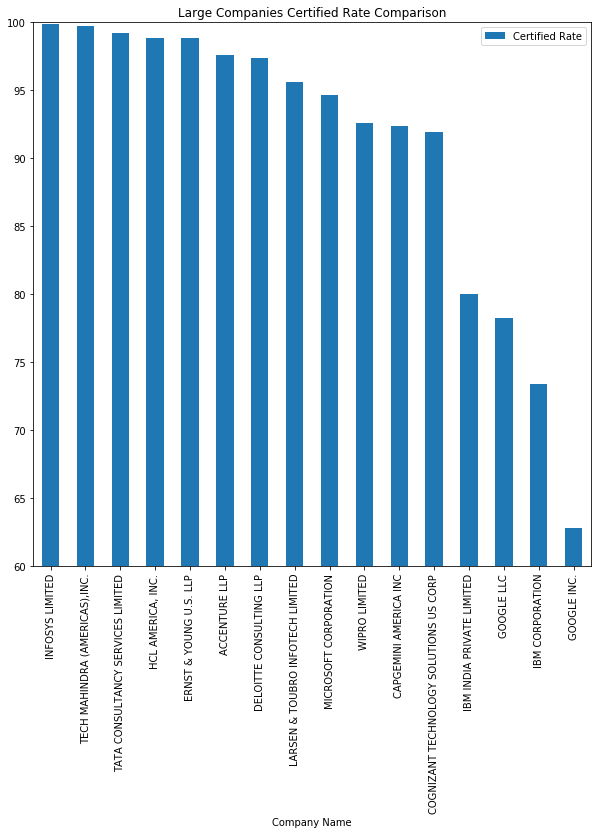

In [65]:
cer_rate = employer_df_5000.drop('Application Number', axis=1)
cer_rate.plot(kind='bar', title='Large Companies Certified Rate Comparison', figsize=(10,10)).set_ylim(60,100)

## FUNCTION

In [5]:
def filter_size(group, minimum):
    stats = {}
    for name, data in group:
        size = len(data)
        if size > minimum:
            stats[name] = size

    tup = sorted(stats.items(), key=operator.itemgetter(1), reverse=True)
    for name, count in tup:
        print(str(name) + ": " + str(count))
    return stats, tup

In [6]:
def calc_accept_rate(group, name):
    df = group.get_group(name)
    com_status = df['CASE_STATUS']
    certified = 0
    for i in com_status:
        if i == 'CERTIFIED':
            certified += 1
        
    return certified * 1.0 / len(com_status)

In [7]:
def calc_rate(group, tup):
    rate = {}
    for name, cnt in tup:
        rate[name] = calc_accept_rate(group, name)
    rate_tup = sorted(rate.items(), key=operator.itemgetter(1), reverse=True)
    return rate, rate_tup

In [37]:
def store_stats(group, rate_tup, stats, title, store=True):
    group_name = []
    group_app_cnt = []
    group_certified_rate = []
    for name, rate in rate_tup:
        group_name.append(name)
        group_app_cnt.append(stats[name])
        group_certified_rate.append(round(rate * 100, 2))
    
    group_df = pd.DataFrame([group_name, group_app_cnt, group_certified_rate])
    group_df = group_df.transpose()
    group_df.columns = [title, 'Application Number', 'Certified Rate']
    if store:
        group_df.to_csv(title + '_Statistics.csv', index=False)
    return group_df

## Certified Rate by Worksite State

In [9]:
state_group = raw_data.groupby('WORKSITE_STATE')
state_stats, state_tup = filter_size(state_group, 1000)
state_rate, state_rate_tup = calc_rate(state_group, state_tup)

CA: 247886
TX: 130669
NY: 113270
NJ: 83314
IL: 64041
WA: 52318
MA: 50985
PA: 47428
GA: 45832
FL: 44989
MI: 41961
VA: 36420
NC: 35625
OH: 31425
MD: 21566
MN: 21299
AZ: 19482
CT: 17027
MO: 16930
TN: 14126
CO: 13953
WI: 13190
IN: 13028
OR: 9370
DC: 8420
DE: 7292
IA: 6504
UT: 6459
AR: 6303
SC: 6135
KS: 5539
KY: 5388
RI: 4621
NE: 4525
LA: 3737
AL: 3652
OK: 3638
NV: 3151
NH: 3079
NM: 1894
ID: 1782
MS: 1505
ME: 1333
HI: 1091
WV: 1054


In [16]:
state_df = store_stats(state_group, state_rate_tup, state_stats, 'State')
state_df.head(5)

,State,Application Number,Certified Rate
0,RI,4621,91.41
1,WA,52318,90.72
2,KY,5388,90.48
3,ME,1333,89.8
4,DE,7292,89.56


In [15]:
state_df = state_df.sort_values(by=['Application Number'], ascending=False)
state_df.head()

,State,Application Number,Certified Rate
31,CA,247886,87.13
25,TX,130669,87.74
24,NY,113270,87.79
17,NJ,83314,88.43
13,IL,64041,88.78


(0, 100)

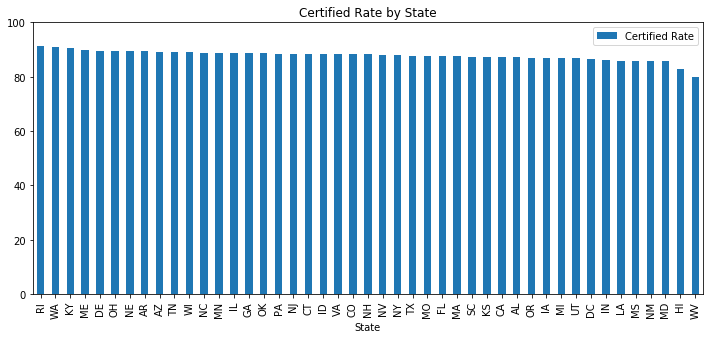

In [24]:
state_rate = state_df.drop('Application Number', axis=1)
state_rate.plot(x='State', y='Certified Rate', kind='bar', title='Certified Rate by State', figsize=(12,5)).set_ylim(0,100)



## Certified Rate by Job Title

In [42]:
job_group = raw_data.groupby('SOC_NAME')
job_stats, job_tup = filter_size(job_group, 2000)
job_rate, job_rate_tup = calc_rate(job_group, job_tup)

SOFTWARE DEVELOPERS, APPLICATIONS: 318946
COMPUTER SYSTEMS ANALYSTS: 153578
COMPUTER OCCUPATIONS, ALL OTHER: 114407
COMPUTER PROGRAMMERS: 93284
SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE: 45536
COMPUTER SYSTEMS ANALYST: 31164
MANAGEMENT ANALYSTS: 25955
ACCOUNTANTS AND AUDITORS: 23082
OPERATIONS RESEARCH ANALYSTS: 22897
MECHANICAL ENGINEERS: 20805
NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS: 20605
FINANCIAL ANALYSTS: 19910
DATABASE ADMINISTRATORS: 17917
COMPUTER AND INFORMATION SYSTEMS MANAGERS: 15270
MARKET RESEARCH ANALYSTS AND MARKETING SPECIALISTS: 15022
ELECTRICAL ENGINEERS: 14001
ELECTRONICS ENGINEERS, EXCEPT COMPUTER: 13241
STATISTICIANS: 12870
PHYSICIANS AND SURGEONS, ALL OTHER: 12451
MEDICAL SCIENTISTS, EXCEPT EPIDEMIOLOGISTS: 9933
WEB DEVELOPERS: 9492
INDUSTRIAL ENGINEERS: 8213
CIVIL ENGINEERS: 7803
BIOLOGICAL SCIENTISTS, ALL OTHER: 7217
ENGINEERS, ALL OTHER: 7003
BIOCHEMISTS AND BIOPHYSICISTS: 6273
MARKETING MANAGERS: 5866
PHYSICAL THERAPISTS: 5792
FINANCIAL SPECIALISTS, ALL OTHER

In [44]:
job_df = store_stats(job_group, job_rate_tup, job_stats, 'Job')
job_df.head(10)

,Job,Application Number,Certified Rate
0,COMPUTER SYSTEMS ANALYST,31164,98.86
1,COMPUTER SYSTEMS ENGINEERS/ARCHITECTS,2645,98.34
2,SOFTWARE QUALITY ASSURANCE ENGINEERS AND TESTERS,4169,96.86
3,WEB DEVELOPERS,9492,96.5
4,INFORMATION SECURITY ANALYSTS,5472,91.7
5,MANAGEMENT ANALYSTS,25955,90.72
6,COMPUTER NETWORK ARCHITECTS,3668,90.65
7,"FINANCIAL SPECIALISTS, ALL OTHER",5626,90.44
8,"COMPUTER OCCUPATIONS, ALL OTHER",114407,90.2
9,PHYSICAL THERAPISTS,5792,90.02


## Certified Rate by Salary Range

In [4]:
wage_data = raw_data[raw_data['PW_UNIT_OF_PAY'] == 'Year']
print(wage_data['PREVAILING_WAGE'].mean())
wage_data.shape

83219.04758232577


(1194280, 52)

In [8]:
wage_gr = wage_data.groupby(pd.cut(wage_data["PREVAILING_WAGE"], np.arange(0, 300000.0+20000.0, 20000)))


In [9]:
wage_stats, wage_tup = filter_size(wage_gr, 0)

(60000.0, 80000.0]: 424953
(80000.0, 100000.0]: 293996
(40000.0, 60000.0]: 204438
(100000.0, 120000.0]: 142032
(120000.0, 140000.0]: 61707
(20000.0, 40000.0]: 23717
(140000.0, 160000.0]: 22870
(160000.0, 180000.0]: 9403
(180000.0, 200000.0]: 5046
(200000.0, 220000.0]: 2849
(220000.0, 240000.0]: 1501
(240000.0, 260000.0]: 768
(260000.0, 280000.0]: 313
(280000.0, 300000.0]: 309
(0.0, 20000.0]: 266


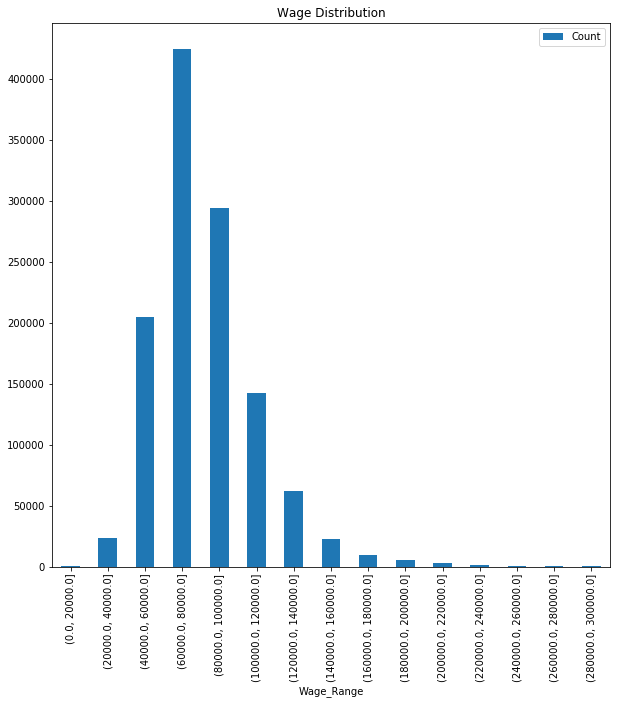

In [10]:
wage_df = pd.DataFrame(sorted(wage_tup), columns=['Wage_Range', 'Count']).set_index('Wage_Range')
wage_df.plot(kind='bar', title='Wage Distribution', figsize=(10, 10))

(0.7, 1)

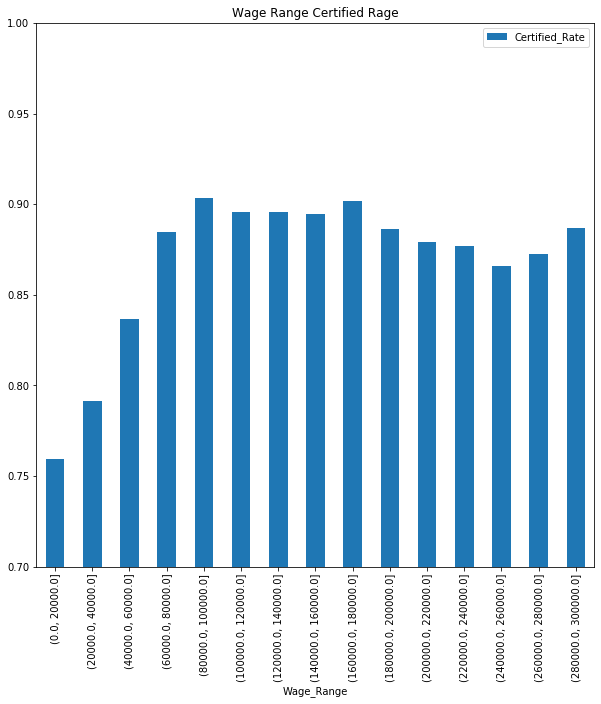

In [11]:
wage_rate, wage_rate_tup = calc_rate(wage_gr, wage_tup)
wage_rate_df = pd.DataFrame(sorted(wage_rate_tup), columns=['Wage_Range', 'Certified_Rate']).set_index('Wage_Range')
wage_rate_df.plot(kind='bar', title='Wage Range Certified Rage', figsize=(10, 10)).set_ylim(0.7,1)

## Certified Rate by Application Submit Month

In [25]:
raw_data.columns

Index(['CASE_NUMBER', 'CASE_STATUS', 'CASE_SUBMITTED', 'VISA_CLASS',
       'EMPLOYMENT_START_DATE', 'EMPLOYMENT_END_DATE', 'EMPLOYER_NAME',
       'EMPLOYER_BUSINESS_DBA', 'EMPLOYER_ADDRESS', 'EMPLOYER_CITY',
       'EMPLOYER_STATE', 'EMPLOYER_POSTAL_CODE', 'EMPLOYER_COUNTRY',
       'EMPLOYER_PROVINCE', 'EMPLOYER_PHONE', 'EMPLOYER_PHONE_EXT',
       'AGENT_REPRESENTING_EMPLOYER', 'AGENT_ATTORNEY_NAME',
       'AGENT_ATTORNEY_CITY', 'AGENT_ATTORNEY_STATE', 'JOB_TITLE', 'SOC_CODE',
       'SOC_NAME', 'NAICS_CODE', 'TOTAL_WORKERS', 'NEW_EMPLOYMENT',
       'CONTINUED_EMPLOYMENT', 'CHANGE_PREVIOUS_EMPLOYMENT',
       'NEW_CONCURRENT_EMPLOYMENT', 'CHANGE_EMPLOYER', 'AMENDED_PETITION',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'PW_UNIT_OF_PAY',
       'PW_WAGE_LEVEL', 'PW_SOURCE', 'PW_SOURCE_YEAR', 'PW_SOURCE_OTHER',
       'WAGE_RATE_OF_PAY_FROM', 'WAGE_RATE_OF_PAY_TO', 'WAGE_UNIT_OF_PAY',
       'H1B_DEPENDENT', 'WILLFUL_VIOLATOR', 'SUPPORT_H1B', 'LABOR_CON_AGREE',
       'PUBLIC_D

In [26]:
app_group = raw_data.groupby('CASE_SUBMITTED')
app_stats, app_tup = filter_size(app_group, 1000)
app_rate, app_rate_tup = calc_rate(app_group, app_tup)

3: 417073
2: 162449
1: 91804
8: 80627
4: 77899
5: 76189
6: 74317
7: 65896
12: 58906
10: 58451
9: 58351
11: 57048


In [28]:
app_df = store_stats(app_group, app_rate_tup, app_stats, 'Case Submitted', False)
app_df.head(5)

,Case Submitted,Application Number,Certified Rate
0,8.0,80627.0,89.53
1,5.0,76189.0,89.00
2,1.0,91804.0,88.90
3,11.0,57048.0,88.62
4,9.0,58351.0,88.61


(0, 100)

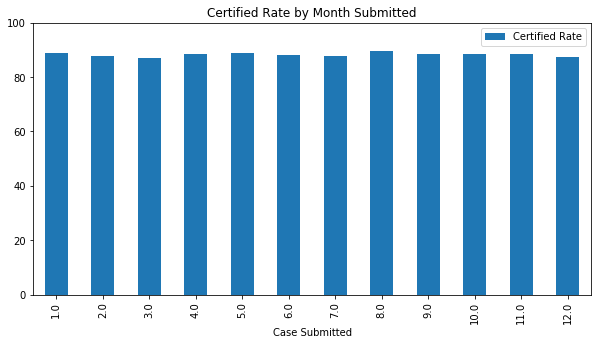

In [32]:
app_rate = app_df.sort_values(by=['Case Submitted'], ascending=True)
app_rate.plot(x='Case Submitted', y='Certified Rate', kind='bar', title='Certified Rate by Month Submitted', figsize=(10,5)).set_ylim(0,100)

## By Employment Start/End Year

In [33]:
start_group = raw_data.groupby('EMPLOYMENT_START_DATE')
start_stats, start_tup = filter_size(start_group, 1000)
start_rate, start_rate_tup = calc_rate(start_group, start_tup)

end_group = raw_data.groupby('EMPLOYMENT_END_DATE')
end_stats, end_tup = filter_size(end_group, 1000)
end_rate, end_rate_tup = calc_rate(end_group, end_tup)

17: 603518
18: 566693
16: 78043
15: 14008
19: 11435
14: 5186
20: 580958
21: 518258
19: 117080
18: 41141
17: 12471
22: 8819


In [35]:
start_df = store_stats(start_group, start_rate_tup, start_stats, 'Emp Start Year', False)
start_df.head(10)

,Emp Start Year,Application Number,Certified Rate
0,19.0,11435.0,94.73
1,18.0,566693.0,92.31
2,17.0,603518.0,89.81
3,16.0,78043.0,62.98
4,15.0,14008.0,0.00
5,14.0,5186.0,0.00


In [36]:
end_df = store_stats(end_group, end_rate_tup, end_stats, 'Emp End Year', False)
end_df.head(10)

,Emp End Year,Application Number,Certified Rate
0,22.0,8819.0,95.74
1,21.0,518258.0,92.78
2,20.0,580958.0,90.26
3,19.0,117080.0,72.25
4,18.0,41141.0,53.76
5,17.0,12471.0,38.25
